# Anopheles genomes phylogenetic scaffolding notebook

1. Yoann Aselmetti
2. Severine Berard
3. Eric Tannier
4. Cedric Chauve, Department of Mathematics, Simon Fraser University, cedric.chauve@sfu.ca

## Introduction

This notebook describes an improvement of the assembly of several mosquito genomes of the genus *Anopheles* using the newly developed phylogenetic scaffolding methods DeClone and ADseq.

## Material and methods

**To do: ADseq and DeClone, sequencing data, species tree**

## Results

We now describe the results of our analysis, both in terms of scaffolding of extant *Anopheles* genomes, with a special focus on the genome *Anopheles funestus*, and of the ancestral genome maps we obtain, and what we can learn from them in terms of the evolution of the *Anopheles* genus.

In [2]:
import sys, math, numpy as np
%matplotlib inline  
import matplotlib, matplotlib.pyplot as plt

sys.path.insert(0, './scripts')
from declone_aux import *
from plotting import *

# Reading the genes file
GENES_import(read_tab_file("./data/anopheles_genes_filtered"))
OG_import(read_tab_file("./data/anopheles_genes_filtered"))
GENOMES_import(read_tab_file("./data/anopheles_genes_filtered"))
# Reading the BESST file
BESST_import(read_tab_file("./data/anopheles_besst"))
# Reading the DeClone results file
DECLONE_import(read_tab_file("./results/anopheles_results_01_all"))

### Overview of scaffolding adjacencies for extant genomes

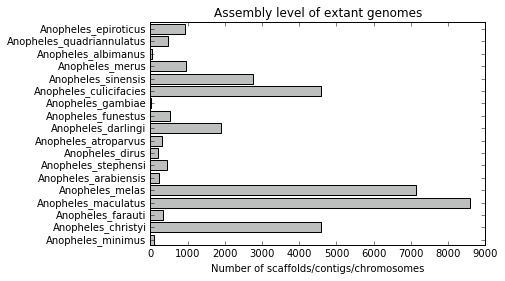

In [9]:
# Plotting the fragmentation of each genome
GENOMES_FRAGMENTATION={species_name: {0: GENOMES_nbscf(species_name)} for species_name in GENOMES_list()}
xlabel = "Number of scaffolds/contigs/chromosomes"
title  = "Assembly level of extant genomes"
plot_scores_distribution_per_species(GENOMES_FRAGMENTATION, 0, 0.5, xlabel, title)

species name	<0.1	<0.2	<0.3	<0.4	<0.5	<0.6	<0.7	<0.8	<0.9	<1.0
Anopheles_minim	19	0	0	1	1	2	0	0	2	24
Anopheles_chris	902	2	28	53	156	85	123	75	77	3119
Anopheles_farau	21	0	1	1	4	3	2	11	4	181
Anopheles_macul	1795	48	164	343	1588	325	55	186	69	5638
Anopheles_melas	2873	76	539	616	1302	870	91	394	122	3861
Anopheles_arabi	154	35	27	19	11	6	10	8	10	61
Anopheles_steph	59	2	0	4	10	24	4	11	5	255
Anopheles_dirus	23	0	3	0	3	1	1	5	3	66
Anopheles_atrop	121	24	8	4	1	4	1	1	2	41
Anopheles_darli	46	0	3	7	6	16	7	4	46	706
Anopheles_funes	81	0	11	12	6	10	2	10	21	333
Anopheles_gambi	0	0	0	0	0	0	0	0	0	0
Anopheles_culic	1124	12	25	132	289	291	149	69	66	3627
Anopheles_sinen	330	21	66	120	163	201	82	44	68	1552
Anopheles_merus	216	4	1	5	15	17	24	20	37	583
Anopheles_albim	2	0	0	0	0	0	0	0	0	0
Anopheles_quadr	115	4	14	11	8	15	12	10	8	240
Anopheles_epiro	231	14	5	8	17	31	13	30	26	601


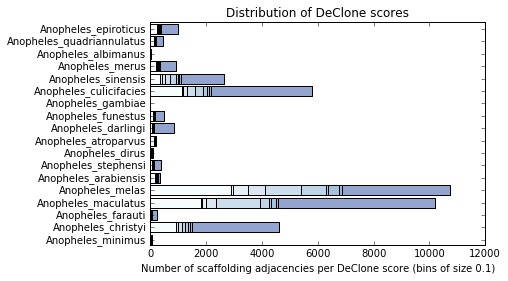

In [26]:
# Computing
# - the distribution of DeClone scores for scaffolding adjacencies in nb_bins bins
# - the number of scaffolding adjacencies per species
def DeClone_scores_distribution(nb_bins):
    ivalues=range(0,nb_bins+1)
    adjacencies_nb                  = {species: 0 for species in GENOMES_list()} 
    adjacencies_scores_distribution = {species: {t : 0 for t in ivalues} for species in GENOMES_list()}
    for instance in DECLONE_instances(): # Populating the structure adjacencies_scores_distribution
        for adjacency in DECLONE_adj_per_instance(instance):
            (score,species) = (DECLONE_adj_score(adjacency), DECLONE_adj_species_name(adjacency))
            if score<1.0 and species!="ANCESTRAL": # Scaffolding adjacency
                adjacencies_scores_distribution[species][math.floor(score*nb_bins)]+=1
                adjacencies_nb[species]+=1
    return((adjacencies_scores_distribution,adjacencies_nb))

# Actual plotting of the results
nb_bins=10 # Binning the adjacencies by bins of size 0.1
ivalues=range(0,nb_bins)
(ADJ_SC_D,ADJ_NB) = DeClone_scores_distribution(nb_bins)

# CC: I do not know how to generate a nice table: this is a pis-aller
print("species name\t"+"\t".join(["<"+str(((t+1)/nb_bins)) for t in ivalues]))
print("\n".join(sp[0:15]+"\t"+"\t".join(str(ADJ_SC_D[sp][t]) for t in ivalues) for sp in ADJ_SC_D.keys()))

xlabel="Number of scaffolding adjacencies per DeClone score (bins of size "+str(1.0/nb_bins)+")"
title="Distribution of DeClone scores"
plot_scores_distribution_per_species(ADJ_SC_D, nb_bins, 1.0, xlabel, title)

We can observe on the table and figure above that many adjacencies seem to have a high DeClone score, aLthough for highly fragmented genomes, we can observe a large number of poorly supported adjacencies. To visualize better, we can observe the ratio of adjacencies per score.

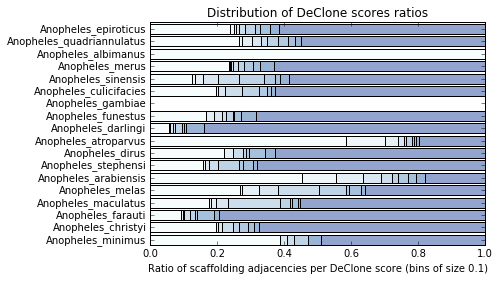

In [27]:
# Ratio of the number of adjacencies in a score bin versus the total number of adjacencies
ADJ_SC_DR={sp : {t: ADJ_SC_D[sp][t]/max(0.1,ADJ_NB[sp]) for t in ADJ_SC_D[sp].keys()} for sp in ADJ_SC_D.keys()} 
xlabel="Ratio of scaffolding adjacencies per DeClone score (bins of size "+str(1.0/nb_bins)+")"
title="Distribution of DeClone scores ratios"
plot_scores_distribution_per_species(ADJ_SC_DR, nb_bins, 1.0, xlabel, title)